# Value Iteration in Dyamic Programming - Reinforcement Learning by `Mr. Harshit Dawar!`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Reinforcement_Learning_Tasks import plot_policy, plot_values, test_agent, Maze

## Initializig the control task environment

In [2]:
control_task = Maze()

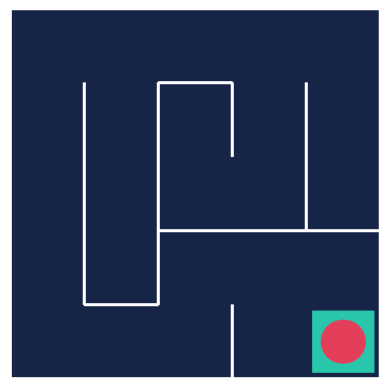

In [3]:
# Printing the Maze Control Task
frame_in_time = control_task.render(mode = "rgb_array")
plt.axis("off")
plt.imshow(frame_in_time)
plt.show()

In [4]:
print("Observation Space shape: {}".format(control_task.observation_space))
print("Number of different actions possible: {}".format(control_task.action_space))

Observation Space shape: MultiDiscrete([5 5])
Number of different actions possible: Discrete(4)


## Defining the Policy for the Value Iteration technique

In [5]:
# Since the control task above has 5 rows, 5 columns, and 4 different actions.
# Filling all the porbabilities as 0.25 i.e. 25%
policy_table = np.full(shape = (5,5,4), fill_value = 0.25)
policy_table

array([[[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]])

In [6]:
# Function to return the probability of the actions to be taken based on the state
def policy(state):
    return policy_table[state]

In [7]:
prob_of_action = policy((0,0))
prob_of_action

array([0.25, 0.25, 0.25, 0.25])

In [8]:
for action, prob in zip(range(4), prob_of_action):
    print("Probability of action: {}, is: {}".format(action, prob))

Probability of action: 0, is: 0.25
Probability of action: 1, is: 0.25
Probability of action: 2, is: 0.25
Probability of action: 3, is: 0.25


## Performing a dry run over the Agent to reach its goal

In [9]:
test_agent(control_task, policy, episodes=1)

### Ploitting a policy

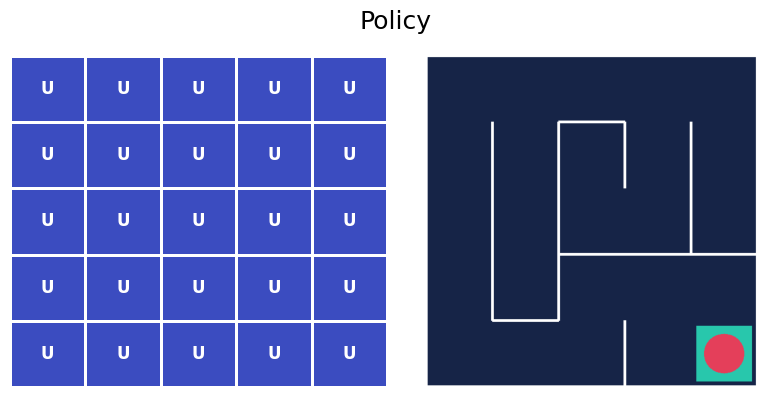

In [10]:
plot_policy(policy_table, frame_in_time)

## Defining the state value tables V(s)

In [11]:
state_value_table = np.zeros(shape = (5,5))
state_value_table

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

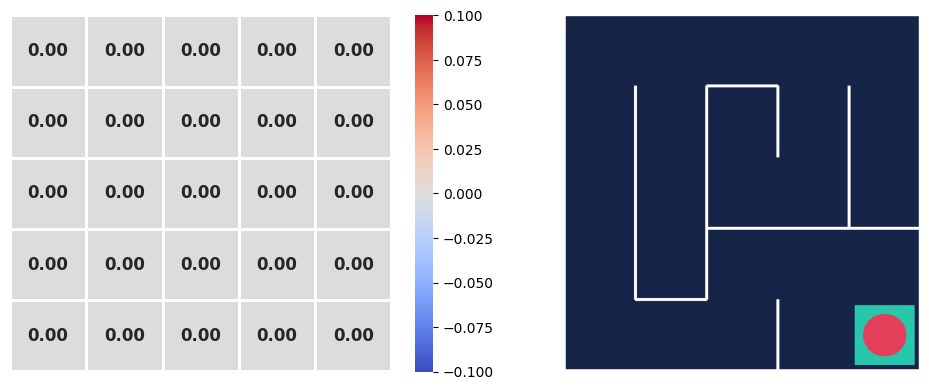

In [12]:
plot_values(state_value_table, frame_in_time)

## Defining the Value Iteration Algorithm

In [13]:
from datetime import datetime

In [14]:
def value_iteration(policy_action_probs, state_values, theta = 1e-5, gamma = 0.95):
    delta = float("inf")
    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_state_value = state_value_table[(row, col)]
                actions_probabilities = None
                # Max Action Value
                max_q_value = float("-inf")
                for action in range(4):
                    next_state, reward, _, _ = control_task.simulate_step((row, col), action)
                    q_value = reward + gamma * state_value_table[next_state]
                    if q_value > max_q_value:
                        max_q_value = q_value
                        actions_probabilities = np.zeros(4)
                        actions_probabilities[action] = 1
                    state_value_table[(row, col)] = max_q_value
                    policy_action_probs[(row, col)] = actions_probabilities

                    delta = max(delta, abs(max_q_value - old_state_value))

In [ ]:
start_time = datetime.now()
value_iteration(policy_table, state_value_table)
end_time = datetime.now()
print("Total time taken in the DP is: {}".format(end_time - start_time))